In [1]:
# Imports
import pandas as pd 
import random as rnd
from pathlib import Path
%matplotlib inline

In [2]:
# Bring in NBA game stats csv contains NBA team data from 2014 to 2018
nba_stats_csv = Path('../1. Data_Cleaning/nba_team_stats.csv')

# Read csv into a pandas Dataframe
game_stats = pd.read_csv(nba_stats_csv)
#game_stats.tail()


In [3]:
# Generate list of teams
teams_filtered = game_stats.Team
teams_filtered = teams_filtered.drop_duplicates()
print(teams_filtered)

0       ATL
82      BOS
164     BRK
246     CHO
328     CHI
410     CLE
492     DAL
574     DEN
656     DET
738     GSW
820     HOU
902     IND
984     LAC
1066    LAL
1148    MEM
1230    MIA
1312    MIL
1394    MIN
1476    NOP
1558    NYK
1640    OKC
1722    ORL
1804    PHI
1886    PHO
1968    POR
2050    SAC
2132    SAS
2214    TOR
2296    UTA
2378    WAS
Name: Team, dtype: object


# User Selected Any Two Teams for Simulation

In [4]:
# Set Variables, users select 2 teams from list above

team_1 = 'SAS'
team_2 = 'LAL'

In [5]:
# Create dataframes for two teams selected

# Team 1 dataframe
t1_df = game_stats[game_stats.Team == team_1]
#t1_df.head()

# Team 2 dataframe
t2_df = game_stats[game_stats.Team == team_2]
#t2_df.head()


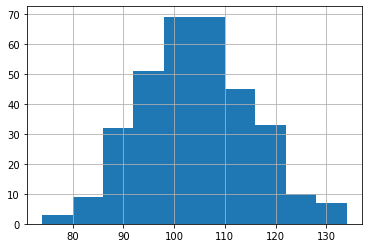

In [6]:
# Create histogram to look at points scored by Team 1
t1_df.TeamPoints.hist()

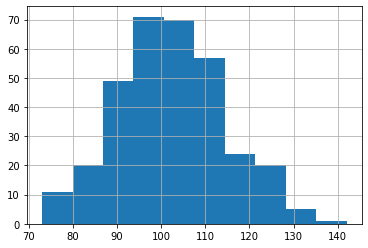

In [7]:
# Create histogram to look at points scored by Team 2
t2_df.TeamPoints.hist()

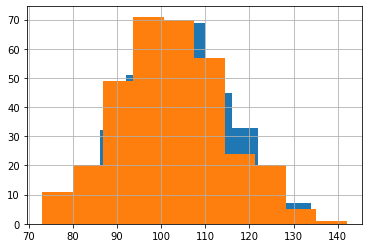

In [8]:
# Overlay points scored histograms
t1_df.TeamPoints.hist()
t2_df.TeamPoints.hist()

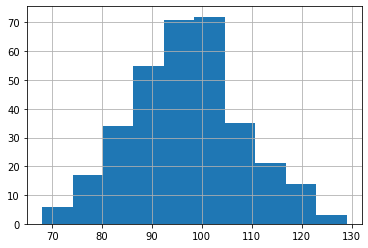

In [9]:
# Create histogram to look at points allowed by team 1
t1_df.OpponentPoints.hist()

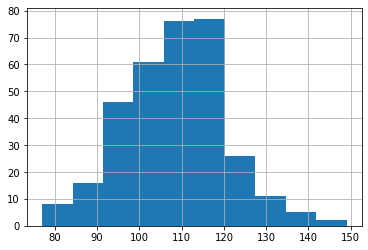

In [10]:
# Create histogram to look at points allowed by team 2
t2_df.OpponentPoints.hist()

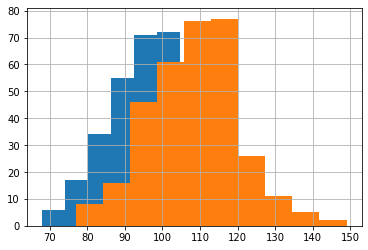

In [11]:
# Overlay histograms to look at points allowed by each team

t1_df.OpponentPoints.hist()
t2_df.OpponentPoints.hist()

In [12]:
# Calculate mean and standard deviation for team 1

t1_mean_pts = t1_df.TeamPoints.mean()
t1_std_pts = t1_df.TeamPoints.std()
t1_mean_opp_pts = t1_df.OpponentPoints.mean()
t1_std_opp_pts = t1_df.OpponentPoints.std()
print("Team 1 Points Mean ", t1_mean_pts)
print("Team 1 Points SD ", t1_std_pts)
print("Team 1 Opponent Points Mean ", t1_mean_opp_pts)
print("Team 1 Opponent Points SD ", t1_std_opp_pts)

Team 1 Points Mean  103.6951219512195
Team 1 Points SD  10.945166667510273
Team 1 Opponent Points Mean  96.96646341463415
Team 1 Opponent Points SD  11.011063535191658


In [13]:
# Calculate mean and standard deviation for team 2

t2_mean_pts = t2_df.TeamPoints.mean()
t2_std_pts = t2_df.TeamPoints.std()
t2_mean_opp_pts = t2_df.OpponentPoints.mean()
t2_std_opp_pts = t2_df.OpponentPoints.std()
print("Team 2 Points Mean ", t2_mean_pts)
print("Team 2 Points SD ", t2_std_pts)
print("Team 2 Opponent Points Mean ", t2_mean_opp_pts)
print("Team 2 Opponent Points SD ", t2_std_opp_pts)

Team 2 Points Mean  102.10975609756098
Team 2 Points SD  12.398092087176295
Team 2 Opponent Points Mean  108.3170731707317
Team 2 Opponent Points SD  12.224583492306762


In [14]:
# Create a mean and standard derivation normal distribuution and randomly sample from it using gaussian function

# To create simulated score sum the mean points scored and standard deviation of points scored for team 1 + mean points allowed and standard deviation of points allowed for team 2 and divide sum by 2 
def gameSim():
    T1_Score = (rnd.gauss(t1_mean_pts, t1_std_pts)+ rnd.gauss(t2_mean_opp_pts,t2_std_opp_pts))/2
    T2_Score = (rnd.gauss(t2_mean_pts, t2_std_pts)+ rnd.gauss(t1_mean_opp_pts,t1_std_opp_pts))/2
    if int(round(T1_Score)) > int(round(T2_Score)):
        return 1
    elif int(round(T1_Score)) < int(round(T2_Score)):
        return -1
    else: return 0

In [15]:
# create function to repeat the simulation for number of games selected

def Simulation(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    tie = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
        else: tie +=1 
    print('SAS Win ', team1win/(team1win+team2win+tie),'%')
    print('LAL Win ', team2win/(team1win+team2win+tie),'%')
    print('Tie Game, Free Basketball! ', tie/(team1win+team2win+tie), '%')
    return gamesout

In [16]:
Simulation(10000)

SAS Win  0.7041 %
LAL Win  0.267 %
Tie Game, Free Basketball!  0.0289 %


[-1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1